In [1]:
from graphviz import Digraph
from IPython.display import Image
import os
os.environ['PATH']+=";C:/Program Files (x86)/Graphviz2.38/bin"

### Project 1: CVA: Credit Value Adjustment
 
 
### Project 2: Portfolio allocation - Markowitz efficient frontier


### Project 3: Monte-Carlo,  Historical VaR and Expected Shortfall 


### Project 4: Management of exotic options: pricing and risks

# Project 1 - CVA

## 1. What is the credit value adjustment (CVA)?

The credit value adjustment is the difference between the risk-free price of a portfolio and its price taking into account the potential default of the counterparty. A CVA is computed for each counterparty  on the aggreated set of deals facing the counterparty. 

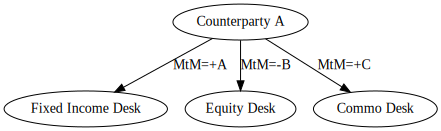

In [44]:
g = Digraph('G', filename='hello.gv')
g.edge('Counterparty A', 'Fixed Income Desk', label='MtM=+A')
g.edge('Counterparty A', 'Equity Desk', label='MtM=-B')
g.edge('Counterparty A', 'Commo Desk', label='MtM=+C')
g

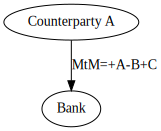

In [45]:
g = Digraph('G', filename='hello.gv')
g.attr(rankdir='UD', size='8,5')
g.edge('Counterparty A', 'Bank', label='MtM=+A-B+C')
g

The CVA is therefore a credit risk measure which is a function of:
- The valuation of the portfolio including all trades facing the counterparty at time of default
- The probability of default of the counterparty
- The recovery in case of default
- The legal / collateral agreement facing the counterparty

A simplified formula for the CVA can be written:

$CVA = LGD \times EPE \times PD$

or more specifically, expliciting each term:

$CVA = (1-R) \int_{0}^{T}ZC(t)EPE(t) dPD(t)$

with:

R: the recovery rate

ZC(t): the zero-coupon discounting factor at time t

EPE(t): the expected positive exposure at time t

PD(t): the probability of default at time t

T: maturity of the portfolio

## 2. EPE and computation of the continuation value

We can define the EPE (expected positive exposure) as the expectation under the risk neutral probability of the portfolio $P$ among the scenarios where $P$ has a positive value (denoted $P+$):

$EPE(t)=\mathbb{E_{Q}}[P^{+}(t)]$

This can be achieved by three alternative ways:

- by calibrating functionals for each kind of product and then estimating the EPE given the static information of the trades (Notional, Maturity, Currency...)
- by using a Monte-Carlo framework to generate market scenarios and then computing the continuation value with either analytical formulas or approximated formulas.
- by using an American Monte-Carlo framework to generate market scenarios and deduce from if the continuation value of the portfolio.

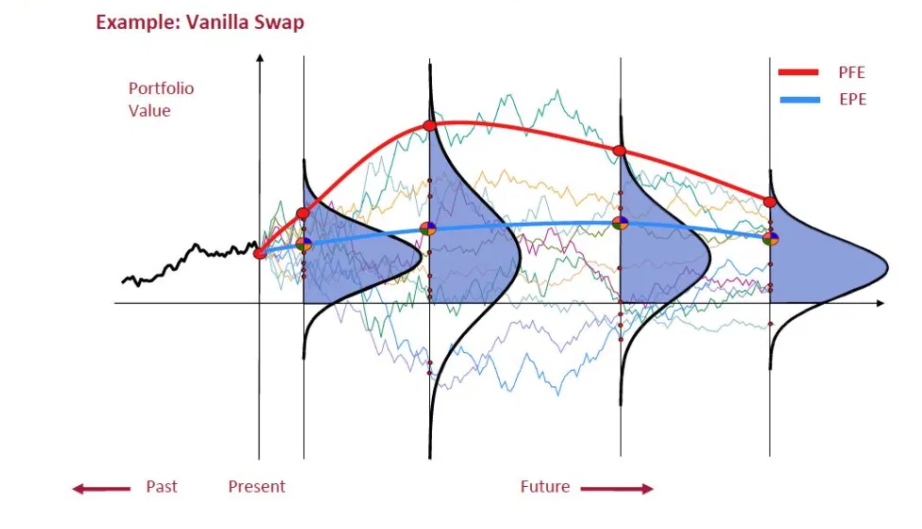

In [4]:
Image("img/epe_pfe.png")

## 3. Stripping of CDS

A credit default swap transfers defined credit risk between counterparties, so its pricing, or premium, represents the market’s view of the reference entity’s credit risk over the duration of the CDS transaction. When entering into a CDS, one counterparty commits to pay a fixed coupon or spread (protection buyer) whereas the other counterparty commits to pay a flow (100% - Recovery) in case of credit event.

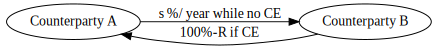

In [19]:
g = Digraph('G', filename='hello.gv')
g.attr(rankdir='LR', size='10,5')
g.edge('Counterparty A', 'Counterparty B', label='s %/ year while no CE')
g.edge('Counterparty B', 'Counterparty A', label='100%-R if CE')
g

Mathematically this can be written as the sum of two legs, one premium leg and one default leg:

$CDS=PV(PremiumLeg)-PV(DefaultLeg)$

$PV(PremiumLeg)=\sum_{i=1}^{N}s_{N} \times \delta t_{i} \times ZC(t_{i}) \times (1-PD(t_{i-1}))$

$PV(DefaultLeg)=\sum_{i=1}^{N} (1-R) \times ZC(t_{i}) \times (PD(t_{i})-PD(t_{i-1}))$

with:
- $s_{N}$: fixed par spread of a CDS of maturity N
- R: recovery rate
- PD(t): probability of default at time t

The par spread s is the spread which gives a CDS price of 0. Therefore, we see the the price of a CDS (or its par spread) implicitely contains information regarding the default probability of the reference entity. With a recovery rate assumption and knowing the risk free rates, we can deduce the implicit default probabilities from the quoted CDS spreads. We can indeed write:



## $s_{N}=\frac{\sum_{i=1}^{N} (1-R) \times ZC(t_{i}) \times (PD(t_{i})-PD(t_{i-1}))}{\sum_{i=1}^{N} \delta t_{i} \times ZC(t_{i}) \times (1-PD(t_{i}))}$

so if we assume that risk free rates are close to 0 ($ZC(t_{i})$ close to 1) and yearly fixed coupon ($\delta t_{i}=1$) then we can write the approximate formula:

## $s_{N} \approx \frac{\sum_{i=1}^{N} (1-R) \times  (PD(t_{i})-PD(t_{i-1}))}{\sum_{i=1}^{N} (1-PD(t_{i}))}$

and therefore, if we know the par spread at year 1, we can write:

## $s_{1} \approx \frac{ (1-R) \times  PD(t_{1})}{ (1-PD(t_{1}))}$

and therefore:

## $PD(t_{1}) \approx \frac {s_{1}}{s_{1}+1-R}$

Re-using the formulas above, we can then deduce $PD(t_{2})$ knowing $s_{1}$ and $PD(t_{1})$. This iterative process which allow to progressively compute a curve of default probabilities is called the boostrapping of CDS spreads.

## 4. Netting Set agreements and collateral

The legal documentation and collateral agreements can be important risk mitigators of the counterparty risk and therefore of the CVA amount.

#### Master Netting Agreements
"An agreement that permits netting of amounts owed under transactions governed by different agreements, often including one or more ISDA Master Agreements. Master netting agreements take different forms and may permit netting of payments to be made under a variety of master or other trading agreements between the same parties and often between their affiliates that may have master or other trading agreements in place between one another." (bis.org)

#### CSA
A credit support annex (CSA) is a document that defines the terms for the provision of collateral by the parties in derivatives transactions. It is one of four parts of a standard contract or master agreement developed by the International Swaps and Derivatives Association (ISDA).

The important characteristics of the CSA impacting the counterparty risk are:

- The eligible currency / assets
- The margin call frequency
- The Collateral threshold
- The Minimum Transfer Amount

## 5. Wrong Way risk

A form of counterparty credit risk, wrong-way risk arises when the exposure to a counterparty increases with the risk of the counterparty’s default.

There are two types of wrong-way risk. 

#### Specific wrong-way risk 

Caused by the specific characteristics of the counterparty or the transaction: for example, if the counterparty posts its own bonds – or bonds of closely linked entities – as collateral.

#### General wrong-way risk 

General or conjectural wrong-way risk is caused by general macroeconomic factors that have the same effect on the exposure to a counterparty and on its probability of default. For example, a bank would be exposed to general wrong-way risk if a rise in interest rates increased both its exposure to a counterparty and the risk of the counterparty’s default.



## Project 1

You will be asked in this project to compute the CVA of an option facing AXA counterparty. We will assume that you are buying a Put on Eurostoxx50 facing the counterparty.
    
1/ In the Black Scholes framework, and using the black scholes analytical formula of a put, write a python program which generates with Monte-Carlo simulations the distribution of the underlying $S(t)$  and of the continuation value $P(t)$. You will using the below inputs:

$S_{0}=2800$

$K=2700$

$r=0.01$

$\sigma=0.3$

$T=10y$

2/ Assuming no collateral, plot the EPE(t) profile of the put option. 

3/ Using the AXA cds spreads of the database, apply the bootstrapping approach to estimate the default probabilities $PD(t)$ of Axa up to the maturity of the put option assuming a recovery of 40%. Display the default probabilities by maturity.

4/ Compute the CVA of the put option facing AXA combining the recovery assumption, the EPE(t) profile, and the default probabilities.

5/ Discuss the existence of a specific or general wrong way risk in the CVA computed above. What model improvement could be brought to the framework above in order to take WWR into account ?

# Project 2 - Portfolio Allocation

Among the diversity of potential allocation with different portfolio returns and variances, Markowitz introduces the concept of an "effficient" portfolio. To increase his expected return, an investor needs to accept an increased risk. An efficient portfolio is a portfolio which shows the highest return for given a level of risk, or which shows the lowest level of risk of a given level of expected return. In the below following section we will focus on the computation of an efficient frontier without risk-free asset.

## 1. Mathematics with no risk-free asset

The pptimal portfolio weights are obtained by minimizing the variance of the portfolios with the constraint of a return $\mu_{p}$. The sum of the weights is equally to 1. Mathematically, we have:

$min_{w} w' \sum w$

with the constraints:

$w' \mu = \mu_{p}$

$w' e = 1$

with w being the vector of weights of the portfolio components, $\mu$ the vector of returns, $\sum$ the variance - covariance matrix, and e=[1,...,1].

To solve this minimization problem we can use the Lagrange multiplier method (method to allow finding the local minima of a function taking into account contraints). We define:

$L = w' \sum w + \lambda_{1} (\mu_{p} - w' \mu) + \lambda_{2} (1-w' e)  $

with $\lambda_{1}$ and $\lambda_{2}$ the Lagrange multiplier. The optimal condition can be written:

$\frac{\partial L}{\partial w} = 2 \sum w - \lambda_{1} \mu -\lambda_{2} e = 0$

$\iff w = \frac{\lambda_{1}}{2}\sum^{-1} \mu + \frac{\lambda_{2}}{2}\sum^{-1} e$

Combining this with the constraint:



Combining this with the constraints:

$w' \mu = \mu_{p}$

$w' e = 1 $

$\iff $

$\mu ' w = \mu_{p}$

$e' w = 1$

$\iff$

$\lambda_{1} \mu' \sum ^ {-1} \mu + \lambda_{2} \mu' \sum^{-1} e = 2 \mu_{p}$

$\lambda_{1} e' \sum ^ {-1} \mu + \lambda_{2} e' \sum^{-1} e = 2 $

If we define the below constants:

$A=e' \sum^{-1} \mu = \mu ' \sum^{-1} e$

$B=\mu ' \sum^{-1} \mu$

$C=e ' \sum^{-1} e$

The system to solve can be re-written:

$\lambda_{1}B + \lambda_{2}A = 2 \mu_{p}$

$\lambda_{1}A + \lambda_{2}C = 2 $

which leads after solving to the results:

$\lambda_{1}=2 \frac{C \mu_{p}-A}{D}$

$\lambda_{2}=2 \frac{B-A \mu_{p}}{D}$

with: $D=BC-A^{2}$

Re-using the above equations and solutions we finally get the optimal weight to minimize the variance of the portfolio:

$w_{p}=g+h \mu_{p}$

with:

$g=\frac{1}{D}[B(\sum^{-1} e)-A(\sum^{-1} \mu)]$

$h=\frac{1}{D}[C(\sum^{-1} \mu)-A(\sum^{-1} e)]$

We can then compute the efficient frontier which corresponds to the sets of efficient allocation $(\mu_{p}, \sigma_{p})$ with :

$\sigma_{p}=\sqrt{w'_{p} \sum w_{p}} \\
=\sqrt{(\frac{\lambda_{1}}{2} \mu' \sum^{-1}  + \frac{\lambda_{2}}{2} e' \sum^{-1}  ) \sum w_{p}} \\
=\sqrt{\frac{\lambda_{1}}{2} \mu'  w_{p} + \frac{\lambda_{2}}{2} e' w_{p}} \\
=\sqrt{\frac{\lambda_{1}}{2} \mu_{p} + \frac{\lambda_{2}}{2}} \\
=\sqrt{\frac{1}{D} (C \mu_{p}^{2} -2A \mu_{p} + B)} \\
$

## 2. Example with a portfolio of 3 risky assets

In [33]:
import numpy as np
from numpy.linalg import inv
import math

np_mu=np.array([0.1, 0.2, 0.15])
np_sigma=np.array([[1, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.6]])
e=np.array([1,1,1])

np_sigma_inv=inv(np_sigma)
np_sigma_inv
np_mu_tr=np.transpose(np_mu)
np_e_tr=np.transpose(np_e)

A=np_mu_tr.dot(np_sigma_inv.dot(e))
B=np_mu_tr.dot(np_sigma_inv.dot(np_mu))
C=np_e_tr.dot(np_sigma_inv.dot(e))
D=B*C-A*A

def efficient_sigma(mu_p):
    sigma_p=math.sqrt((1/D)*(C*mu_p*mu_p-2*A*mu_p+B))
    return sigma_p

list_mu_p=np.arange(0.001, 0.3, 0.01)
list_sigma_p=list(map(efficient_sigma, list_mu_p))


Text(0.5, 1.0, 'Markowitz Efficient Frontier')

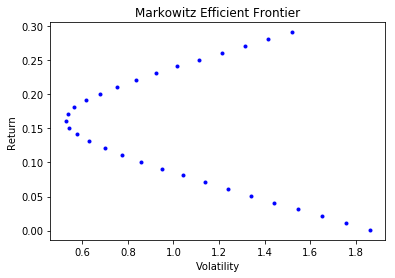

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots() #create plot object    
axes.plot(list_sigma_p, list_mu_p, 'b.') #plot the lists 
axes.set_xlabel('Volatility') #change x label
axes.set_ylabel('Return') #change y label
axes.set_title('Markowitz Efficient Frontier') # change title

## 3. Efficient frontier with a risk aversion parameter input

We can also express the efficient frontier in a different way by maximizing the utility function of a rational investor which will be charaterized by a risk aversion parameter $\gamma$.

The resulting portfolio is the portfolio which maximizes the expectancy of the utility functions $\mathbb{E}[U(W)]$. In the Markowitz framework, this is equivalent to maximizing the optimizing return-variance function below:

$max_{w}\mathbb{E}[U(W)] \equiv max_{w} \big(w'\mu - \frac{\gamma}{2} w' \sum w \big)$

We observe that the more the investor is risk averse ($\gamma$ increasing), the more the risk of the optimal portfolio impacts the investor's expected return: the optimal portfolio is therefore less risky. The maximization of the function has the below optimal weights:

$w*=\frac{1}{\gamma} \sum^{-1} \mu$

Those weights are obtained by optimizing the quadratic function (finding w to cancel the first order derivative while having a negative second order derivative, which implied its maximization).

## Project 2

1/ Using the database provided, build a dataframe with historical time series of spots containing SP500, Eurostoxx, Gold, and WTI front month prices. Compute Log returns and provide a statistical description of each underlying (mean, variance, skewness, kurtosis).

2/ Fit each underlying to the normal distribution, plot for each the historical distribution and the fitted normal distribution,  discuss the quality of the fit and what are the factors which could explain the fit limitations.

3/ Compute the historical variance - covariance matrix and compute / display the Markowitz efficient frontier for a portfolio composed of those 4 underlyings.

4/ With a target return of 3%, repeat the same process with an historical window of 1 year and plot the historical split of the portfolio (historical weights). What do you conclude regarding the stability of the portfolio allocation ?

5/ Discuss the limitations of the current approach using the Markowitz efficient frontier. Think of the parameters which are estimated for the allocation, and the potential constraints on the market which may not be captured by the defined framework.

6/ Assuming a risk aversion parameter obtained as the historical sharp ratio of an equally weighted portfolio, find the portolio allocation which maximizes the return-variance function.

# Project 3: Monte-Carlo, Historical VaR and other risk measures

## 1. VaR definition
Value at risk (VaR) is a measure of the risk of loss for investments. It estimates how much a set of investments might lose (with a given probability). For a given portfolio, and a probability p, the p VaR can be defined as the maximum potential loss after we have filtered out the worst losses with a cumulated probability p.

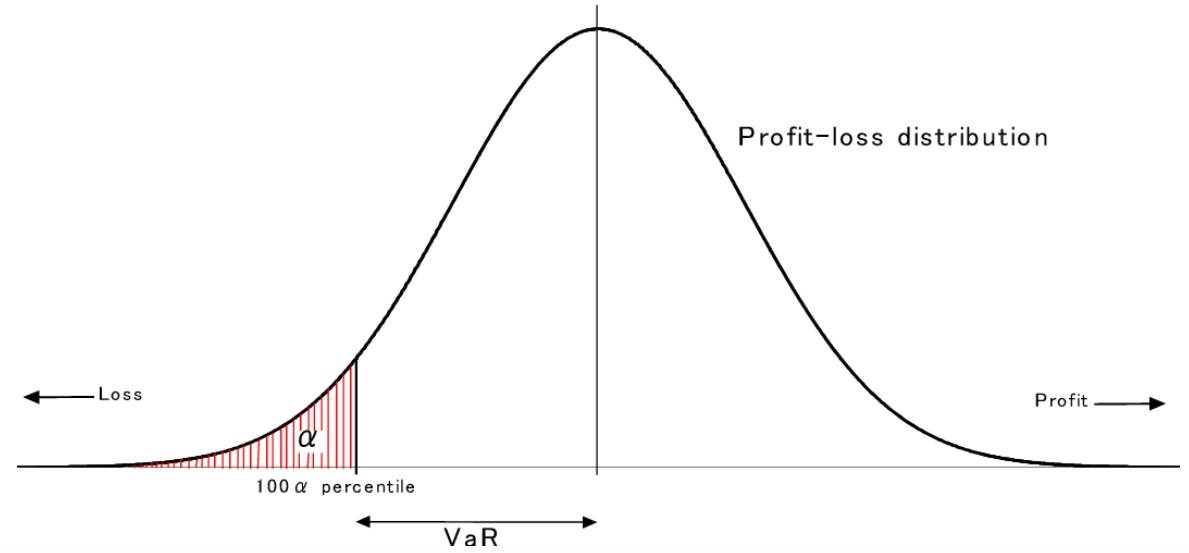

In [38]:
Image("img/var.png")

Mathematically, the Value At Risk can be interpreted as a quantile of the distribution of a random variable. If we denote by $F_{\alpha}(x)$ the CDF of a random variable, then its corresponding p-VaR can be defined as the p-percentile:

$VaR_{p}=x_{p}=inf[x |F_{\alpha}(x) \geq p]$

## 2. Expected Shortfall definition

The Expected Shortfall (ES) at p% level is the expected return on the portfolio in the worst p% of cases. ES is an alternative to value at risk. Is is also known as CVaR (or Conditional VaR).

Mathematically, if X is a portfolio, the expected shortfall can be defined as a conditional expectation on the VaR:

$ES_{\alpha}(X)=E[-X | X \leq -VaR_{\alpha}(X)] = -\frac{1}{\alpha}\int_{0}^{\alpha}VaR_{p}(X)dp$

## 3. Coherent risk measure properties

In the following, we will denote by $\rho$ a risk measure. A risk measure is said to be coherent if it satisfies the below properties:

- Normalized: $\rho(0)=0$ (the risk of holding no assets is 0)
- Sub-additivity: $\rho(X_{1}+X_{2}) \leq \rho(X_{1}) + \rho(X_{2})$. Having a position in two different assets can only decrease the risk of the portfolio.
- Positive homogeneity: $\rho (\lambda X)=\lambda \times \rho{X}$. Doubling a position in asset X double your risk.
- Translation invariance: $\rho(X+c)=\rho(X)-c$. Adding cash to a portfolios can only dimish the risk of the portfolio.

## 4. Conceptual differences between expected shortfall and Value at Risk


- VaR is not a coherent risk measure whereas ES is. In particular the sub-additivity property is not satisfied by the VaR measure.
- VaR is a percentile of a distribution whereas the ES is a conditional expectation. THis means that the VaR correponds to an actually observed/simulated portfolio loss whereas the ES is an average which can be a value never reached by the portfolio. On the other side the ES, being an expectation, can have some linear properties that are not observed with the VaR measure.
- The ES goes further in the tail than the VaR, so is able to capture extreme events (or black swans) which could be missed by the VaR measure.


## Project 3

1/ Using the database provided, build a dataframe with historical time series of spots containing SP500, Eurostoxx, Gold, and WTI front month prices. Compute Log returns and provide a statistical description of each underlying (mean, variance, skewness, kurtosis).

2/ Assuming that the portfolio is equally weighted, compute the 1% historical VaR and 1% expected shortfall of the portfolio.

3/ VaR-based portfolio allocation: simulating 50000 random portfolio composition, compute for each composition the observed return and the $VaR_{1 \%}$ of the created portfolio. Which portfolio composition shows the highest ratio Return / VaR ? Display in a XY scatter plot with the various generated scenario (X = VaR, Y=Return).

4/ Fit each underlying to the normal distribution, and compute the variance-covariance matrix based on historical observations. From this, build a Monte-Carlo simulator which diffuses the 4 underlyings according to the calibrated parameters. The diffusion should contains 50 000 simulations, over 1 year and with a step of 1 day.

5/ Compute the $VaR_{1 \%}$ and 1% ES of an equally weighted portfolio from the Monte-Carlo simulations. Compare with the results of question 2/ and discuss both approaches (pros and cons of each).

# Management of exotic options

## 1. Typical exotic option payoff

A classic example of exotic payoff is a strip of barrier options with a DIP at maturity on a Worst of basket. We define

- $S^{1}_{t}$: the spot of underlying 1 at time t
- $S^{2}_{t}$: the spot of underlying 2 at time t
- $WO_{t}=Min(\frac{S^{1}_{t}}{S^{1}_{0}}-1, \frac{S^{2}_{t}}{S^{2}_{0}}-1)$: the worst of basket.
- $B_{c}$: the coupon barrier
- $c$: the annual coupon
- $B$: the Down and In Put barrier
- $K$: the strike of the DIP option

The payoff would be described as:

- At maturity, the investor receives back is cash of 100
- At each annual observation, if $WO_{t}>B_{c}$ then the investor receives a coupon $c$.
- If at any point in time we observe $WO_{t}<B$, the DIP is activated and the investor is short of a put $(K-WO_{t})^{+}$

## 2. Risks
Such product is exposed so several market risks: We can in particular highlight:

- Delta risk on each underlying
- Forward risk (dividend, repo)
- Volatility risk on each underlying
- Correlation risk
- Gamma / Cross Gamma risk
- Vanna / Cross Vanna risk
- Volga




## 2. Hedges
To hedge such payoff, more or less liquid products are available, either listed or on the IDB:

- Electronic market to hedge delta / dividend risk (Future on spot, Future on dividend)
- Listed market for short / medium term options. IDB / Internal for longer maturities.
- Call vs Call, Quanto Forwards, ELS for correlation risk (mostly IDB)


## Project 4

1/ Let's assume we have just sold the above exotic option on a basket SX5E / Gold for EUR1m, maturity 10y. Describe the main greeks and the direction (long / short) of each greek.

2/ Based on historical data available in the database, calibrate the mean, variance, covariance SX5E / Gold and build a Monte-Carlo simulator to diffuse a correlated market diffusing both the Eurostoxx and Gold. Assuming a time step of 1 day, a maturity of 10 years, display the first 10 trajectories (with the parameters) of each underlying.

3/ Implement the payoff of the exotic option above in order to compute its payoff for each Monte-Carlo simulation. Price the exotic and compute with a finite difference method the delta / gamma / vega / correlation greeks. You can assume a DIP barrier of 50%, a strike of 100%, a coupon barrier of 80%, a coupon of 5%.

4/ Assuming that the exotic option is already delta / forward hedged, and that only ATM options are liquid and can be traded, find the amount of options for each underlying in order to flatten the vega of the portfolio. You can assume that the notional sold of exotic options is EUR 1m.

5/ Assuming that the portfolio is now vega hedged, compute and plot the vanna and volga profiles of the exotic option only and the vanna/volga of the vega hedged portfolio. Discuss the implication of such profile from a portfolio management perspective and from a model perspective.

6/ In case a crash / risk on scenario where the underlyings loose simulatenously 30% and the volatilities increase by +20%, which risk factors do you expect to drive the P&L of the portfolio ?